# Exploring the contents of an ActivePaper

In [1]:
%matplotlib inline
from activepapers.exploration import ActivePaper
import matplotlib.pyplot as plt
import numpy as np

Download and open the ActivePaper ["Model-free simulation approach to molecular diffusion tensors: Water"](http://dx.doi.org/10.6084/m9.figshare.808595)

In [2]:
ap = ActivePaper("doi:10.6084/m9.figshare.808595")

If the ActivePaper has a dataset documentation/README, its contents are stored in the docstring:

In [3]:
?ap

Make a plot showing data from the ActivePaper:

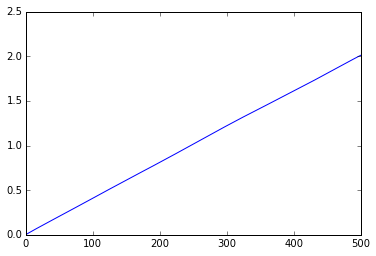

In [4]:
msd_time = ap.data['mean_square_displacement_time'][...]
msd_averaged_lab_xx = ap.data['averaged/mean_square_displacement_laboratory_frame'][0, 0]
plt.plot(msd_time, msd_averaged_lab_xx)

And another plot:

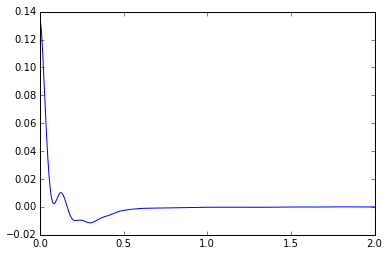

In [5]:
vacf_time = ap.data['correlation_function_time'][:2000]
vacf_averaged_lab_xx = ap.data['averaged/correlation_function_laboratory_frame'][0, 0, :2000]
plt.plot(vacf_time, vacf_averaged_lab_xx)

We can use Python modules stored in the ActivePaper:

In [6]:
import time_series

Compute an indefinite integral and plot it:

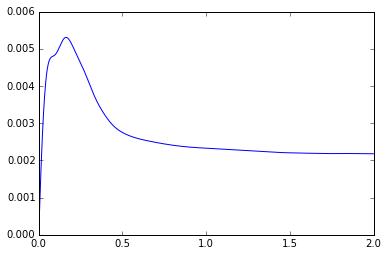

In [7]:
dt = vacf_time[1]-vacf_time[0]
plt.plot(vacf_time, time_series.integral(vacf_averaged_lab_xx, dt))

We can also use code from ActivePapers that are linked to in the one we opened. The following cell uses the [MOSAIC](https://github.com/mosaic-data-model/mosaic-python) library for molecular data. It is just an illustration of the feature, you don't actually need to import the library for working with the data in the ActivePaper.

In [8]:
import mosaic.mutable_model as M
from mosaic.api import is_valid

is_valid(M.Fragment("solvent", "water", (),
                    (M.Atom("H1", M.Element("H"), 1),
                     M.Atom("H2", M.Element("H"), 1),
                     M.Atom("O",  M.Element("O"), 1)),
                    (("H1", "O", "single"), ("H2", "O", "single"))))

True

Retrieve a PDF plot stored as an internal file in the ActivePaper:

In [9]:
# A small wrapper around the data to tell Jupyter that this is PDF data
class PDF(object):
    def __init__(self, pdf_data):
        self.pdf_data = pdf_data
    def _repr_pdf_(self):
        return self.pdf_data

# Read the internal file
with ap.open_documentation('averaged/c_tt_diagonal.pdf') as pdf_file:
    stored_plot = PDF(pdf_file.read())

In [10]:
stored_plot